In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from glob import glob
import random
from uncertainties import ufloat
from uncertainties import unumpy
import tensorflow as tf
#np.random.seed(69)
tf.random.set_seed(
    420133769
)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    #dt = pd.Series(df.timestamp).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

In [9]:
nodelabels=['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben', 'Matrize_zarge_mitte','Matrize_zarge_unten', 'Werkstueck_boden', 'Werkstueck_zarge_unten' , 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

filenames = glob("../merged/*.csv")
#sample from list XX% train test
train = random.sample(filenames, int(len(filenames)*0.7))                      
test = list(set(filenames) - set(train))
print(test)
train_df = []
print('train_data')
for filename in train:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates()#.drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    train_df.append(df_wd)
    
train_data= pd.concat(train_df, axis=0, ignore_index=True).dropna()



print('test_data')
test_df = []

for filename in test:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates()#.drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    test_df.append(df_wd)  
    
test_data= pd.concat(test_df, axis=0, ignore_index=True).dropna()



['../merged/merged_WS1000_WZ120_p11_t8.csv', '../merged/merged_WS840_WZ140_p23_t10.csv', '../merged/merged_WS1000_WZ100_p15_t10.csv', '../merged/merged_WS840_WZ130_p16_t6.csv', '../merged/merged_WS840_WZ150_p17_t10.csv', '../merged/merged_WS1000_WZ110_p15_t10.csv', '../merged/merged_WS840_WZ150_p23_t10.csv', '../merged/merged_WS840_WZ130_p21_t8.csv', '../merged/merged_WS840_WZ150_p11_t4.csv', '../merged/merged_WS1000_WZ110_p18_t10.csv', '../merged/merged_WS840_WZ130_p14_t8.csv', '../merged/merged_WS1000_WZ110_p19_t4.csv', '../merged/merged_WS840_WZ140_p23_t4.csv', '../merged/merged_WS840_WZ140_p10_t4.csv', '../merged/merged_WS840_WZ130_p23_t8.csv', '../merged/merged_WS840_WZ140_p12_t6.csv', '../merged/merged_WS1000_WZ110_p20_t10.csv', '../merged/merged_WS1000_WZ100_p13_t8.csv', '../merged/merged_WS840_WZ140_p20_t4.csv', '../merged/merged_WS1000_WZ100_p21_t8.csv', '../merged/merged_WS940_WZ70_p14_t8.csv', '../merged/merged_WS890_WZ160_p10_t8.csv', '../merged/merged_WS840_WZ140_p16_t10.c

reading: ../merged/merged_WS1000_WZ110_p22_t4.csv
reading: ../merged/merged_WS840_WZ150_p18_t6.csv
reading: ../merged/merged_WS840_WZ140_p16_t6.csv
reading: ../merged/merged_WS1000_WZ110_p24_t8.csv
reading: ../merged/merged_WS840_WZ150_p23_t8.csv
reading: ../merged/merged_WS1000_WZ110_p18_t6.csv
reading: ../merged/merged_WS840_WZ150_p18_t10.csv
reading: ../merged/merged_WS1000_WZ100_p14_t8.csv
reading: ../merged/merged_WS1000_WZ100_p17_t10.csv
reading: ../merged/merged_WS840_WZ140_p24_t4.csv
reading: ../merged/merged_WS940_WZ70_p13_t8.csv
reading: ../merged/merged_WS840_WZ150_p23_t4.csv
reading: ../merged/merged_WS840_WZ140_p11_t6.csv
reading: ../merged/merged_WS1000_WZ100_p22_t6.csv
reading: ../merged/merged_WS940_WZ70_p14_t10.csv
reading: ../merged/merged_WS1000_WZ110_p17_t4.csv
reading: ../merged/merged_WS1000_WZ120_p13_t10.csv
reading: ../merged/merged_WS840_WZ140_p24_t8.csv
reading: ../merged/merged_WS1000_WZ100_p16_t6.csv
reading: ../merged/merged_WS1000_WZ110_p11_t6.csv
reading:

reading: ../merged/merged_WS840_WZ150_p17_t10.csv
reading: ../merged/merged_WS1000_WZ110_p15_t10.csv
reading: ../merged/merged_WS840_WZ150_p23_t10.csv
reading: ../merged/merged_WS840_WZ130_p21_t8.csv
reading: ../merged/merged_WS840_WZ150_p11_t4.csv
reading: ../merged/merged_WS1000_WZ110_p18_t10.csv
reading: ../merged/merged_WS840_WZ130_p14_t8.csv
reading: ../merged/merged_WS1000_WZ110_p19_t4.csv
reading: ../merged/merged_WS840_WZ140_p23_t4.csv
reading: ../merged/merged_WS840_WZ140_p10_t4.csv
reading: ../merged/merged_WS840_WZ130_p23_t8.csv
reading: ../merged/merged_WS840_WZ140_p12_t6.csv
reading: ../merged/merged_WS1000_WZ110_p20_t10.csv
reading: ../merged/merged_WS1000_WZ100_p13_t8.csv
reading: ../merged/merged_WS840_WZ140_p20_t4.csv
reading: ../merged/merged_WS1000_WZ100_p21_t8.csv
reading: ../merged/merged_WS940_WZ70_p14_t8.csv
reading: ../merged/merged_WS890_WZ160_p10_t8.csv
reading: ../merged/merged_WS840_WZ140_p16_t10.csv
reading: ../merged/merged_WS1000_WZ100_p24_t8.csv
reading:

In [10]:
train_data.keys()

Index(['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen',
       'Matrize_zarge_oben', 'Matrize_zarge_mitte', 'Matrize_zarge_unten',
       'Werkstueck_boden', 'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1', 'timestamp_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [11]:

Werkstueck_labels = ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',                       
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben']
 

In [12]:
train_data.keys()

Index(['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen',
       'Matrize_zarge_oben', 'Matrize_zarge_mitte', 'Matrize_zarge_unten',
       'Werkstueck_boden', 'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1', 'timestamp_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [13]:
X_train = train_data.drop(labels=Werkstueck_labels , axis=1)
y_train = train_data[targets]
X_test = test_data.drop(labels=Werkstueck_labels, axis=1)
y_test = test_data[targets]

In [14]:
def kfold(model, k):
    train_scores = []
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
    
        y_hat_train = model.predict(fold_X)    
        rmse, variance = evaluate(fold_y, y_hat_train, 'train')
        train_scores.append([rmse, variance])

        y_hat_test = model.predict(X_test)
        test_rmse, test_variance = evaluate(y_hat_test, y_hat_test)
        test_scores.append([test_rmse, test_variance])
    
    mean_train = np.mean(train_scores, axis=0)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

### Simple linear model as baseline

In [15]:
#kfold
model=LinearRegression()
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
train set RMSE:8.864882086842023, R2:0.9994037954934935
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:4.16088178339154, R2:0.9998698095468549
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:11.94557599536364, R2:0.9989018294095153
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:8.3+/-3.2 , R2:0.9994+/-0.0004


In [16]:
# over all data
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:10.371045285399441, R2:0.9991827438239739
test set RMSE:10.497511169880143, R2:0.9991505597196414


(10.497511169880143, 0.9991505597196414)

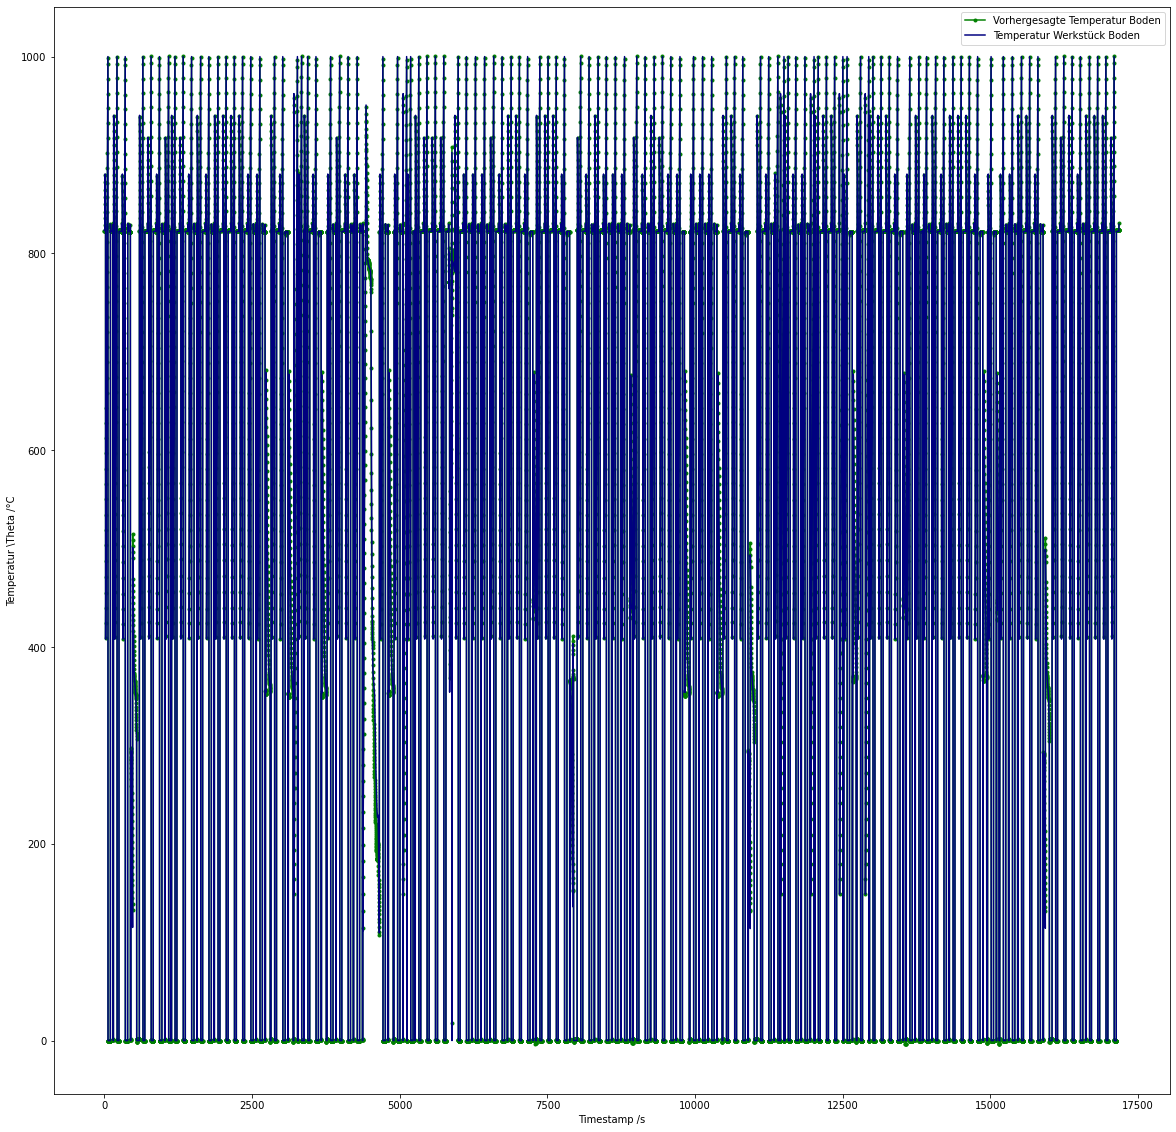

In [17]:
Timestamp=np.arange(len(test_data))
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, test_data['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
#plt.xlim(, )
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [131]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [132]:
mean_train, std_train = kfold(rf, 3)

__________Fold 1__________
train set RMSE:1.2612888934742337, R2:0.9999879277580751
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:0.17356944170753727, R2:0.9999997733067666
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.1646350732018864, R2:0.9999895603882879
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:0.9+/-0.5 , R2:0.999992+/-0.000005


In [88]:
RMSEs = []
R2s = []
for trees in np.arange(10, 200,10):
    rf = RandomForestRegressor(n_estimators=trees)
    RMSE, R2 = kfold(rf, 3)
    RMSEs.append(RMSE)
    R2s.append(R2)



RMSEs  = unumpy.uarray([x.nominal_value for x in RMSEs],[x.std_dev for x in RMSEs] )
R2s  = unumpy.uarray([x.nominal_value for x in R2s],[x.std_dev for x in R2s] )


__________Fold 1__________
train set RMSE:1.1327085769877066, R2:0.99999026338174
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:0.2551341113201947, R2:0.9999995102433621
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.2156488474813976, R2:0.999988625616222
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:0.9+/-0.4 , R2:0.999993+/-0.000005
__________Fold 1__________
train set RMSE:1.2884927520133034, R2:0.9999874012507243
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:0.20023543500782892, R2:0.9999996983333287
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.4726689065885545, R2:0.999983308118294
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.0+/-0.6 , R2:0.999990+/-0.000007
__________Fold 1__________
train set RMSE:1.2617114683805792, R2:0.9999879196302958
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:0.1995378867894017, R2:0.9999997004150251
test set RMSE

KeyboardInterrupt: 

In [ ]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of trees')
ax1.set_ylabel('RMSE')
ax1.errorbar(np.arange(10,200,10), unumpy.nominal_values(RMSEs), yerr=unumpy.std_devs(RMSEs),label='RMSE',marker='x',ls='', color=color)
ax1.tick_params(axis='y')
ax1.set_ylim(0.3,2.1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R²')  # we already handled the x-label with ax1
ax2.errorbar(np.arange(10,200,10), unumpy.nominal_values(R2s), yerr=unumpy.std_devs(R2s),label='R²',marker='x',ls='', color=color)
ax2.tick_params(axis='y')
ax2.ticklabel_format(useOffset=False)
ax2.set_ylim(0.9999,1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper center')
plt.savefig('plots/tree_parameter.png')
print(np.arange(10,200,10)[unumpy.nominal_values(RMSEs)==min(unumpy.nominal_values(RMSEs))])
print(np.arange(10,200,10)[unumpy.std_devs(RMSEs)==min(unumpy.std_devs(RMSEs))])

In [136]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:2.147996651742743, R2:0.9999649152912689
test set RMSE:2.1492194247968914, R2:0.9999643760394817


(2.1492194247968914, 0.9999643760394817)

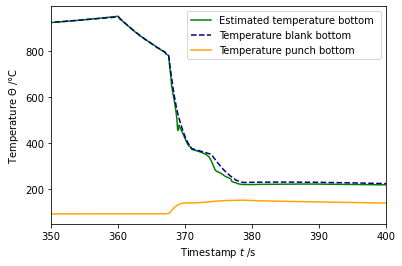

In [137]:
y = y_test[4380:4650]
Timestamp = X_test['timestamp'][4380:4650]
y2 = test_data[4380:4650]

#plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0][4380:4650], 'g-', label='Estimated temperature bottom ')
plt.plot(Timestamp, y['Werkstueck_boden'], '--',label='Temperature blank bottom', color='navy')
plt.plot(Timestamp, y2['Stempel_innen_mitte'],label='Temperature punch bottom', color='orange')

plt.ylabel('Temperature $\Theta$ /°C')
plt.xlabel('Timestamp $t$ /s')
plt.xlim(350, 400)
plt.legend()


plt.savefig('plots/random_forest_model.png')

In [158]:
y_rf = y['Werkstueck_boden']
Timestamp = X_test['timestamp'][4380:4650]
start_temp =  y_rf[Timestamp==360].values[0]
finish_temp = 230
t_start = 360
t_finish = Timestamp[(y_rf<=finish_temp)&(Timestamp>360)].head(1).values[0]
print(start_temp, finish_temp , t_start, t_finish )
cooling_rate = (finish_temp-start_temp)/(t_finish-t_start)
cooling_rate

950.896 230 360 378.36


-39.264488017429166

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

In [28]:
mean_train, std_train = kfold(gb, 3)

__________Fold 1__________
train set RMSE:2.141972243836099, R2:0.9999651842223339
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:1.3462334546545252, R2:0.9999863660454532
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:2.5901859874289714, R2:0.9999483639777904
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:2.0+/-0.5 , R2:0.999967+/-0.000016


In [29]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:2.7184232456054622, R2:0.9999438278917253
test set RMSE:2.635536445881353, R2:0.9999464371728252


(2.635536445881353, 0.9999464371728252)

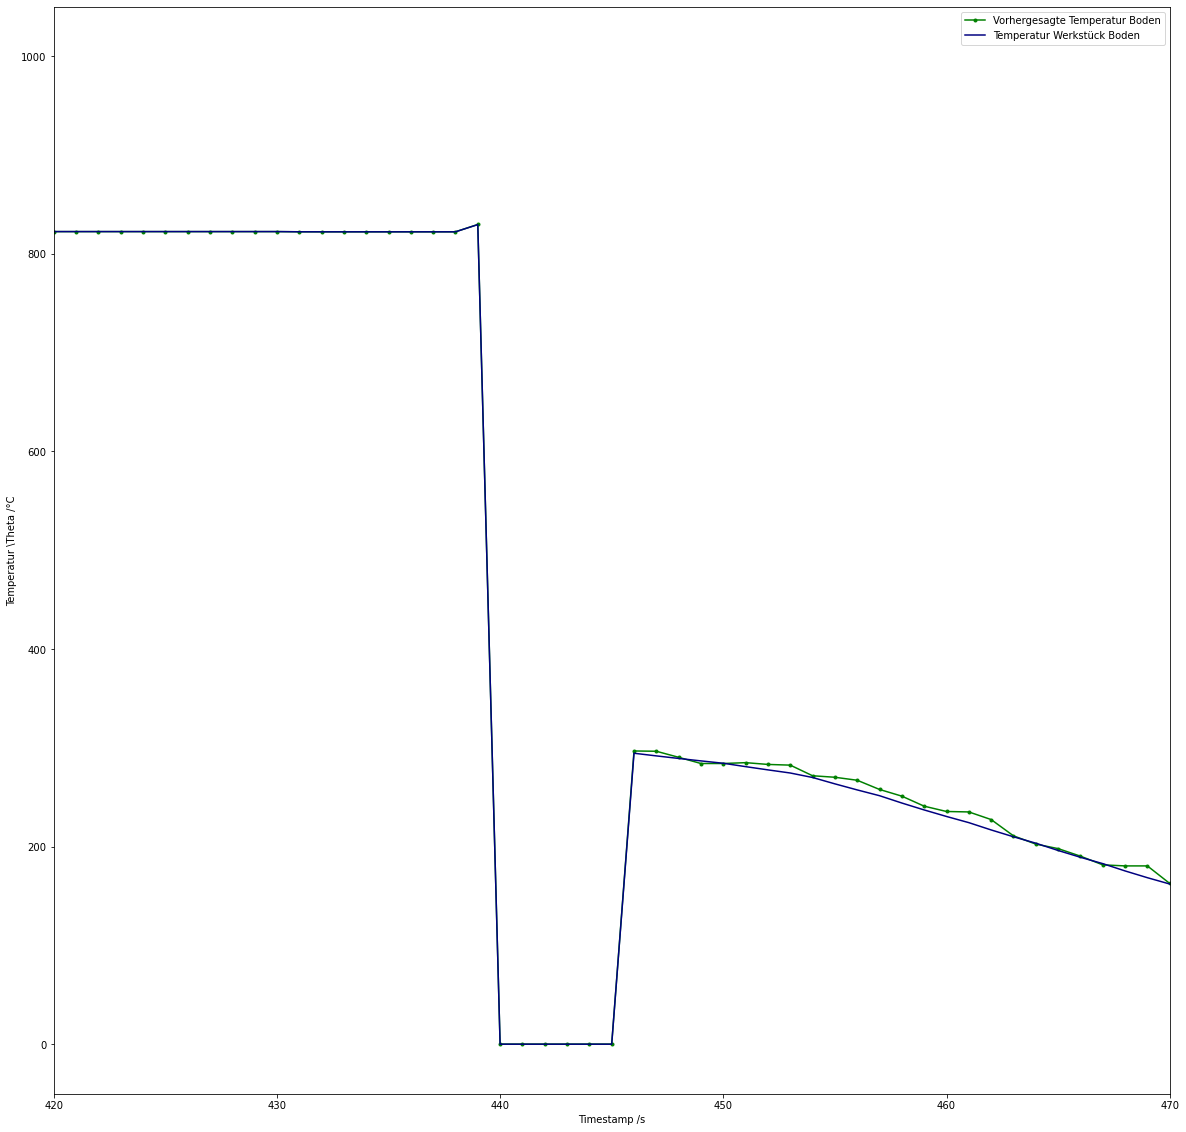

In [30]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [32]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3,683
Trainable params: 3,683
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 100
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/100
1263/1263 [==============================] - 2s 1ms/step - loss: 15.8030 - val_loss: 7.3144
Epoch 2/100
1263/1263 [==============================] - 2s 1ms/step - loss: 13.2753 - val_loss: 7.3311
Epoch 3/100
1263/1263 [==============================] - 2s 2ms/step - loss: 13.6637 - val_loss: 20.7236
Epoch 4/100
1263/1263 [==============================] - 2s 2ms/step - loss: 14.7187 - val_loss: 9.7431
Epoch 5/100
1263/1263 [==============================] - 2s 2ms/step - loss: 11.1019 - val_loss: 38.2715
Epoch 6/100
1263/1263 [==============================] - 2s 2ms/step - loss: 18.7865 - val_loss: 12.8816
Epoch 7/100
1263/1263 [==============================] - 2s 2ms/step - loss: 12.7615 - val_loss: 19.1459
Epoch 8/100
1263/1263 [==============================] - 2s 2ms/step - loss: 11.4601 - val_loss: 13.3562
Epoch 9/100
1263/1263 [==============================] - 2s 2ms/step - loss: 14.0366 - val_loss: 18.2625
Epoch 10/100
1263/1263 [==============================] - 

1263/1263 [==============================] - 2s 2ms/step - loss: 8.6609 - val_loss: 6.8406
Epoch 80/100
1263/1263 [==============================] - 2s 2ms/step - loss: 9.5912 - val_loss: 5.9525
Epoch 81/100
1263/1263 [==============================] - 2s 2ms/step - loss: 7.2612 - val_loss: 6.5723
Epoch 82/100
1263/1263 [==============================] - 2s 2ms/step - loss: 11.0631 - val_loss: 6.4436
Epoch 83/100
1263/1263 [==============================] - 2s 2ms/step - loss: 7.5923 - val_loss: 5.1655
Epoch 84/100
1263/1263 [==============================] - 2s 2ms/step - loss: 9.8464 - val_loss: 21.5177
Epoch 85/100
1263/1263 [==============================] - 2s 2ms/step - loss: 7.2792 - val_loss: 24.2609
Epoch 86/100
1263/1263 [==============================] - 2s 2ms/step - loss: 7.7472 - val_loss: 8.3852
Epoch 87/100
1263/1263 [==============================] - 2s 2ms/step - loss: 9.3007 - val_loss: 5.1286
Epoch 88/100
1263/1263 [==============================] - 2s 2ms/step - lo

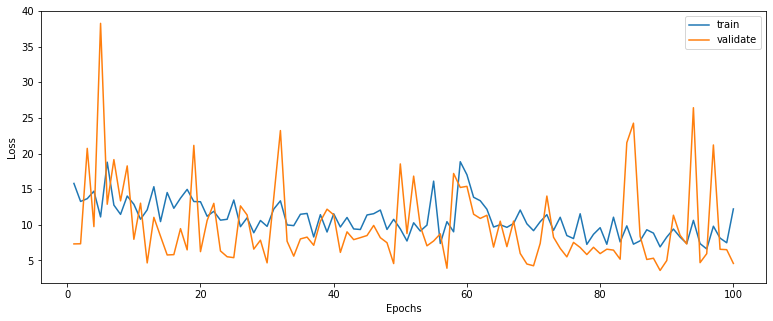

In [35]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [36]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:2.275763954741883, R2:0.9999606363776957
test set RMSE:2.138453037386731, R2:0.9999647412045185


(2.138453037386731, 0.9999647412045185)

In [37]:
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
421/421 [==============================] - 1s 1ms/step - loss: 8.4738
train set RMSE:2.266857624943845, R2:0.9999610154618441
test set RMSE:0.0, R2:1.0
__________Fold 2__________
421/421 [==============================] - 1s 1ms/step - loss: 5.6667
train set RMSE:1.7194726806223544, R2:0.9999777579289119
test set RMSE:0.0, R2:1.0
__________Fold 3__________
421/421 [==============================] - 1s 1ms/step - loss: 7.1043
train set RMSE:1.9015202280449244, R2:0.9999721680281413
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.96+/-0.23 , R2:0.999970+/-0.000007


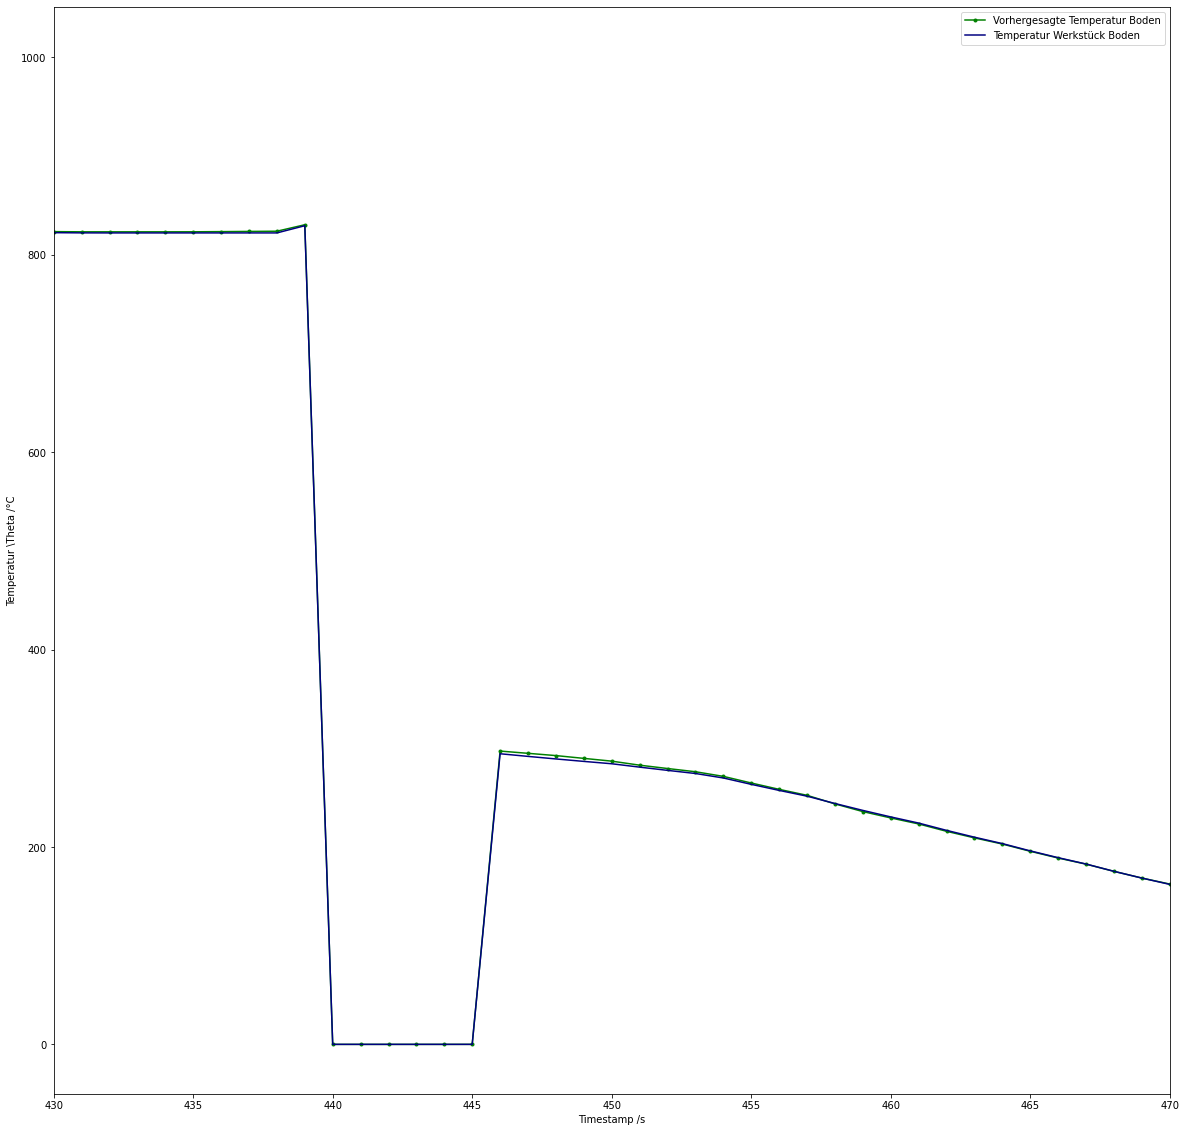

In [38]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(430, 470)
plt.legend()

plt.savefig('plots/mlp.png')

In [39]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

negloglik = lambda y, rv_y: -rv_y.log_prob(y)

def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
    ])
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

input_dim = len(X_train.keys())
output_dim= len(y_train.keys())

model = Sequential()

model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(tfpl.IndependentNormal.params_size(output_dim),
                       activation=None))
model.add(tfpl.IndependentNormal(output_dim))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1024      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
 independent_normal (Indepen  ((None, 3),              0         
 dentNormal)                  (None, 3))                         
                                                                 
Total params: 3,734
Trainable params: 3,734
Non-trainable params: 0
____________________________________________________

In [40]:
model.compile(loss='mse', optimizer='adam')
epochs = 100
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/100
1263/1263 [==============================] - 3s 2ms/step - loss: 6482.2578 - val_loss: 107.4098
Epoch 2/100
1263/1263 [==============================] - 2s 2ms/step - loss: 87.7414 - val_loss: 82.5992
Epoch 3/100
1263/1263 [==============================] - 2s 2ms/step - loss: 68.5394 - val_loss: 178.5847
Epoch 4/100
1263/1263 [==============================] - 2s 2ms/step - loss: 65.2965 - val_loss: 157.4711
Epoch 5/100
1263/1263 [==============================] - 3s 2ms/step - loss: 59.6356 - val_loss: 51.2365
Epoch 6/100
1263/1263 [==============================] - 2s 2ms/step - loss: 54.9711 - val_loss: 44.1373
Epoch 7/100
1263/1263 [==============================] - 2s 2ms/step - loss: 50.5928 - val_loss: 47.0052
Epoch 8/100
1263/1263 [==============================] - 2s 2ms/step - loss: 47.6976 - val_loss: 47.4769
Epoch 9/100
1263/1263 [==============================] - 2s 2ms/step - loss: 43.6213 - val_loss: 52.6134
Epoch 10/100
1263/1263 [==========================

1263/1263 [==============================] - 2s 2ms/step - loss: 10.0218 - val_loss: 12.7431
Epoch 79/100
1263/1263 [==============================] - 2s 2ms/step - loss: 15.8308 - val_loss: 18.4462
Epoch 80/100
1263/1263 [==============================] - 2s 2ms/step - loss: 14.9633 - val_loss: 23.8649
Epoch 81/100
1263/1263 [==============================] - 2s 2ms/step - loss: 14.4577 - val_loss: 28.9012
Epoch 82/100
1263/1263 [==============================] - 2s 2ms/step - loss: 11.9399 - val_loss: 5.4349
Epoch 83/100
1263/1263 [==============================] - 2s 2ms/step - loss: 10.6711 - val_loss: 4.9485
Epoch 84/100
1263/1263 [==============================] - 2s 2ms/step - loss: 13.7018 - val_loss: 52.5738
Epoch 85/100
1263/1263 [==============================] - 2s 2ms/step - loss: 9.4834 - val_loss: 5.7500
Epoch 86/100
1263/1263 [==============================] - 2s 2ms/step - loss: 13.0886 - val_loss: 7.2021
Epoch 87/100
1263/1263 [==============================] - 2s 2ms

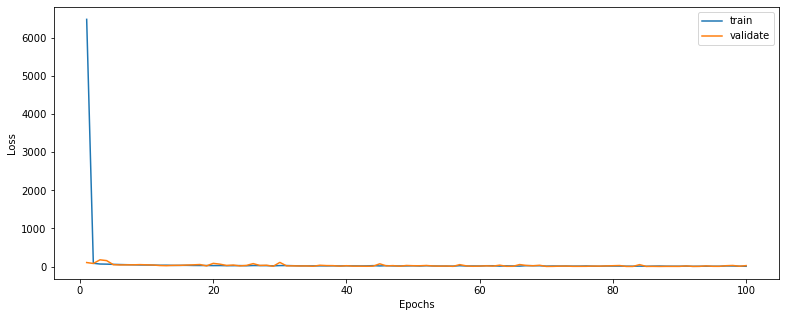

In [41]:
plot_loss(history)


In [42]:
n_vals = 100
yhats = [model.predict(X_test) for _ in range(n_vals)]

In [43]:
#average over all predictions 
avg = np.squeeze(yhats).mean(axis=0)
std = np.squeeze(yhats).std(axis=0)

#calculate some regression metrics
rmse = np.sqrt(np.mean(np.power(y_test-avg,2),axis=0))
print(rmse)
mse = np.mean(np.power(y_test-avg,2),axis=0)
print(mse)
mean_std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
print(mean_std)

Werkstueck_boden          2.49201
Werkstueck_zarge_mitte    5.42059
Werkstueck_zarge_oben     6.69163
dtype: float64
Werkstueck_boden           6.210114
Werkstueck_zarge_mitte    29.382795
Werkstueck_zarge_oben     44.777909
dtype: float64
[0.00032796 0.00040343 0.00035815]


In [44]:
def var_evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

def var_kfold(model, k, nvals=100):
    train_scores = [] 
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
            
        yhats = [model.predict(fold_X) for _ in range(nvals)]  
        avgs = np.squeeze(yhats).mean(axis=0)
        print(np.shape(avgs))
        print(np.shape(fold_y))
        rmse = np.mean(np.sqrt(np.mean(np.power(fold_y-avgs,2),axis=0)))
        variance = r2_score(fold_y, avgs)
        #std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
        train_scores.append([rmse, variance])

    
    mean_train = np.mean(train_scores, axis=0)
    print(train_scores)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

In [45]:
rmses, r2s = var_kfold(model,3)

__________Fold 1__________
421/421 [==============================] - 1s 1ms/step - loss: 14.7653
(13462, 3)
(13462, 3)
__________Fold 2__________
421/421 [==============================] - 1s 1ms/step - loss: 7.6426
(13462, 3)
(13462, 3)
__________Fold 3__________
421/421 [==============================] - 1s 1ms/step - loss: 8.9819
(13461, 3)
(13461, 3)
[[3.616102442432109, 0.9998837829861996], [2.108592458707103, 0.9999598635768484], [2.3198963652292033, 0.9999563768950478]]
__________Summary__________
RMSE:2.7+/-0.7 , R2:0.999933+/-0.000035


In [97]:
y_hat_train = np.mean([model.predict(X_train) for _ in range(n_vals)], axis=0)
y_hat_test = avg

res = unumpy.uarray(avg,std)
print(res)

[[822.523681640625+/-0.0006103515625 823.976318359375+/-0.00048828125
  824.5678100585938+/-0.000244140625]
 [822.5733032226562+/-0.000244140625 823.9531860351562+/-0.0003662109375
  824.5469360351562+/-0.00018310546875]
 [822.6304931640625+/-0.00018310546875 823.929931640625+/-0.0006103515625
  824.5186767578125+/-0.00067138671875]
 ...
 [824.0625610351562+/-0 821.3101806640625+/-0.0001220703125
  822.3914184570312+/-0.000732421875]
 [825.4765014648438+/-0.000244140625 825.304443359375+/-0.0006103515625
  826.7943725585938+/-0]
 [835.9891357421875+/-0.00048828125 841.9813842773438+/-0.0008544921875
  844.2237548828125+/-0.00018310546875]]


ValueError: x and y must have same first dimension, but have shapes (270,) and (17176,)

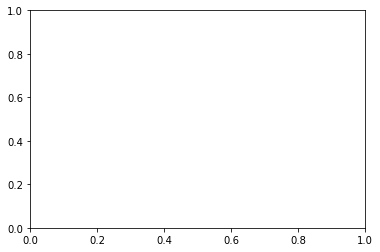

In [98]:

#plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Estimated temperature bottom ')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperature blank bottom', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperature punch bottom', color='orange')
plt.fill_between(Timestamp,  y_hat_test[:,0] + std[:,0],  y_hat_test[:,0]-std[:,0], alpha=0.4)
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperature $\Theta$ /°C')
plt.xlabel('Simulation step a.u.')
plt.xlim(4380, 4650)
plt.legend()
plt.savefig('plots/var_mlp.png', dpi=600)

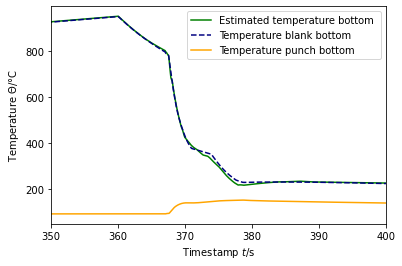

In [101]:
y = y_test[4380:4650]
Timestamp = X_test['timestamp'][4380:4650]
y2 = test_data[4380:4650]
y_hat_test[:,0][4380:4650]
#plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0][4380:4650], 'g-', label='Estimated temperature bottom ')
plt.plot(Timestamp, y['Werkstueck_boden'], '--',label='Temperature blank bottom', color='navy')
plt.plot(Timestamp, y2['Stempel_innen_mitte'],label='Temperature punch bottom', color='orange')
plt.fill_between(Timestamp,  y_hat_test[:,0][4380:4650] + std[:,0][4380:4650],  y_hat_test[:,0][4380:4650]-std[:,0][4380:4650], alpha=0.4)
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperature $\Theta$/°C')
plt.xlabel('Timestamp $t$/s')
plt.xlim(350, 400)
plt.legend()
plt.savefig('plots/var_mlp.png', dpi=600)

In [119]:
y_vmlp = y_hat_test[:,0][4380:4650]
std_vmlp = std[:,0][4380:4650]
Timestamp = X_test['timestamp'][4380:4650]

start_temp =  y_vmlp[X_test['timestamp'][4380:4650]==360][0]
finish_temp = 280
t_start = 360
t_finish = Timestamp[(y_hat_test[:,0][4380:4650]<=finish_temp)&(Timestamp>360)].head(1).values[0]
print(start_temp, finish_temp , t_start, t_finish )
cooling_rate = (finish_temp-start_temp)/(t_finish-t_start)
cooling_rate

952.32104 280 360 375.56


-43.20829337544183

# LSTM?

In [48]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
tf.__version__

'2.8.0'

In [49]:
# taken from the TF Documentation
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=test_data, test_df=test_data,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
    def plot(self, model=None, plot_col='Werkstueck_boden', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [min]')
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
    # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
    # And cache it for next time
        self._example = result
        return result


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(amsgrad=True),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.RootMeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    multi_lstm_model.summary()
    return history



Total window size: 110
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109]
Label column name(s): ['Werkstueck_boden', 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

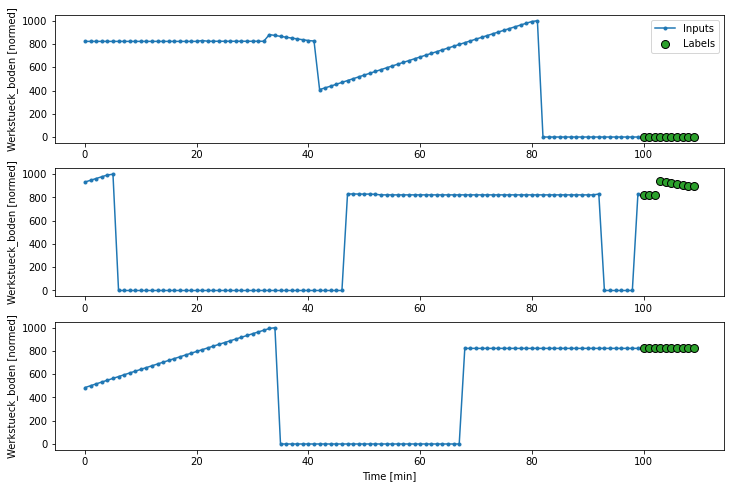

In [50]:
OUT_STEPS = 10
MAX_EPOCHS = 300
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=targets,
                               train_df=train_data,
                               val_df=test_data)

multi_window.plot()
multi_window

In [51]:
num_features = output_dim
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(13, return_sequences=True),
    tf.keras.layers.LSTM(169, return_sequences=False),
    tf.keras.layers.Dense(64),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])


history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/300
1259/1259 [==============================] - 210s 164ms/step - loss: 95478.8672 - mean_absolute_error: 222.5560 - root_mean_squared_error: 308.9965 - val_loss: 54782.2695 - val_mean_absolute_error: 161.8987 - val_root_mean_squared_error: 234.0560
Epoch 2/300
1259/1259 [==============================] - 224s 178ms/step - loss: 53479.5469 - mean_absolute_error: 151.8620 - root_mean_squared_error: 231.2565 - val_loss: 53927.9648 - val_mean_absolute_error: 150.3127 - val_root_mean_squared_error: 232.2240
Epoch 3/300
1259/1259 [==============================] - 234s 186ms/step - loss: 52757.1094 - mean_absolute_error: 149.2780 - root_mean_squared_error: 229.6892 - val_loss: 53492.5742 - val_mean_absolute_error: 148.0186 - val_root_mean_squared_error: 231.2846
Epoch 4/300
1259/1259 [==============================] - 238s 189ms/step - loss: 52155.1289 - mean_absolute_error: 147.6259 - root_mean_squared_error: 228.3750 - val_loss: 53202.1367 - val_mean_absolute_error: 144.8606 - va

534/534 [==============================] - 24s 44ms/step - loss: 38036.8320 - mean_absolute_error: 115.1474 - root_mean_squared_error: 195.0303


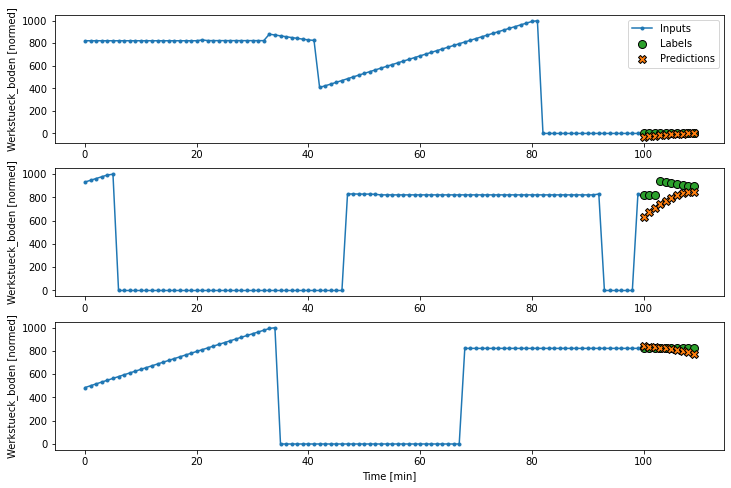

In [52]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


In [53]:
multi_lstm_model.predict(multi_window.val)

array([[[852.85724 , 852.93414 , 853.71906 ],
        [840.5977  , 840.37415 , 840.5906  ],
        [835.8561  , 835.944   , 836.3172  ],
        ...,
        [781.94867 , 779.55164 , 780.111   ],
        [767.382   , 766.83813 , 767.2007  ],
        [753.9867  , 751.5449  , 752.6912  ]],

       [[784.0416  , 784.7665  , 787.2754  ],
        [795.4286  , 792.48444 , 795.0859  ],
        [809.8582  , 810.54095 , 811.33075 ],
        ...,
        [844.2223  , 845.1973  , 846.40247 ],
        [840.6671  , 840.6417  , 841.0993  ],
        [832.7239  , 833.37695 , 834.1226  ]],

       [[741.9929  , 742.84985 , 746.6229  ],
        [765.3383  , 761.2479  , 765.0423  ],
        [789.83966 , 790.17615 , 791.4657  ],
        ...,
        [868.20074 , 871.1992  , 872.47736 ],
        [870.403   , 870.8516  , 871.2719  ],
        [865.58417 , 867.87573 , 868.2643  ]],

       ...,

       [[930.0859  , 928.7587  , 927.1154  ],
        [886.1512  , 890.07104 , 887.4167  ],
        [855.9494  , 8